<a href="https://colab.research.google.com/github/priscilaek/priscilaek/blob/main/Pris_Proyecto_M5_AprendizajeProfundoConRedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nombre: Priscila Elias Kana
## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 5! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo. 



# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predetector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con esta noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
- Prueba tu modelo con esta noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/ (2 puntos por ambas comprobaciones).

## Punto extra
- Usa PyTorch para el entrenamiento.



# Nombre: Priscila Elias Kana

##Libraries (Acondicionamos las librerias a usar en un solo lugar)

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.metrics import r2_score, mean_squared_error
import requests
from bs4 import BeautifulSoup

##Mount google drive (Accedemos al servidor de Google Drive)


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


##Global variables (Lectura de archivos zip y asignacion de la data en variables)

In [5]:
DATA_PATH = "/content/drive/MyDrive/UCamp/WELFake_Dataset.csv.zip"
FAKE_NEWS_URL = "https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/"
TRUE_NEWS_URL = "https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/"

##Load data / Create Dataframe (Se realiza la carga de la Data)

In [6]:
df = pd.read_csv(DATA_PATH)

In [7]:
df.sample(5)

,Unnamed: 0,title,text,label
50913,50913,Anonymous World War 3 Has Begun!,source Add To The Conversation Using Facebook ...,1
69665,69665,Prime Minster John Key caught channeling milli...,"Source: Seemorerocks \n\nNovember 1, 2016 \n\n...",1
38764,38764,Kevin McCarthy announces he's a candidate for ...,The California congressman has worked by John ...,0
30990,30990,MSNBC Sources Say Everyone At Network Is Dist...,Political pundit Joe Scarborough has a Donald ...,1
28368,28368,Trump’s Lapdog Chris Christie Breaks ALL TIME...,Remember when Chris Christie was a contender f...,1


In [8]:
df["label"].value_counts()

1    37106
0    35028
Name: label, dtype: int64

##Data Analysis (Seleccion y limpieza de columnas como Dataframe a trabajar)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
df = df.drop(columns=['Unnamed: 0','title'], axis=1)

In [11]:
df.head(5)

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [12]:
completitud = pd.DataFrame(df.isnull().sum())
completitud

,0
text,39
label,0


In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
print(completitud.index)

Index(['text', 'label'], dtype='object')


In [16]:
df.head(5)

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


##Balance Labels (Revisamos como se componen las etiquetas y si tienen un balance sin sesgos)

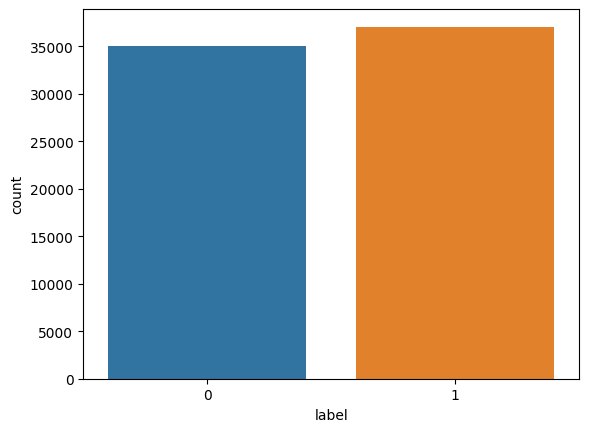

In [17]:
sns.countplot(x=df["label"])
plt.show()

In [18]:
np.unique(df["label"])

array([0, 1])

In [19]:
df['label'].value_counts()

1    37067
0    35028
Name: label, dtype: int64

In [20]:
df['label'].value_counts(normalize=True)

1    0.514141
0    0.485859
Name: label, dtype: float64

In [21]:
df['label'].value_counts(normalize=True).mul(100)

1    51.414106
0    48.585894
Name: label, dtype: float64

In [22]:
df['label'].value_counts(normalize=True).mul(100).round(1)

1    51.4
0    48.6
Name: label, dtype: float64

In [23]:
df['label'].value_counts(normalize=True).mul(100).round(1).astype(str) + "%"

1    51.4%
0    48.6%
Name: label, dtype: object

##Clean text (Realizamos limpieza del texto a trabajar)

- Convert to lowercase
- Remove url
- Remove whitespaces

In [24]:
def clean_text(text):
  text = str(text).strip()
  text = text.lower()
  text = re.sub('https?://\S+|www\. \S+', '', text)
  text = re.sub('\\W',' ', text)
  text = re.sub('\n',' ', text)
  text = re.sub(' +',' ', text)
  text = re.sub('^ ',' ', text)
  text = re.sub(' $',' ', text)
  return text

In [25]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [26]:
df.sample(5)

,text,label,cleaned_text
47930,Ginni Thomas is one of the most hard-working a...,1,ginni thomas is one of the most hard working a...
69815,SEOUL (Reuters) - South Korea s President Moon...,0,seoul reuters south korea s president moon jae...
25653,"21st Century Wire says Tuesday, President Dona...",1,21st century wire says tuesday president donal...
57629,"SEVNICA, Slovenia (Reuters) - The small Sloven...",0,sevnica slovenia reuters the small slovenian t...
4397,BERLIN (Reuters) - German industry association...,0,berlin reuters german industry associations on...


##Data Split (Obtenemos un conjunto de entrenamiento y un subconjunto de datos como prueba)

Dividimos los datos en conjuntos de entrenamiento y prueba

In [27]:
X = df['cleaned_text']
y = df['label']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=18

##Tokenize (Dividimos el texto en palabras, secuencia de tokens para procesar datos)

In [29]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [30]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [31]:
type(X_test)

list

In [32]:
len(X_test)

14419

In [33]:
len(X_test[0])

320

In [34]:
len(X_test[1])

458

##Padding (Se ajusta el contenido para tener un tamaño fijo, con aspecto uniforme y legible)

In [35]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', truncating='post', maxlen=50)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', truncating='post', maxlen=50)

In [36]:
X_test

array([[ 136,    8,   76, ..., 6204,    7,   92],
       [ 364,   48,   88, ...,   29,  247, 1802],
       [ 139,  265,    3, ..., 2403,   11,   48],
       ...,
       [ 382,  150,   46, ..., 1623,    1,  611],
       [ 174,    2,  121, ...,    5,  403,  636],
       [2650, 5784,    9, ...,  430, 1284,    1]], dtype=int32)

In [37]:
X_test.shape

(14419, 50)

##RNN (Se utiliza una red neuronal recurrente de una capa que se compone de varias capas secuenciales para realizar la clasificación)

Este modelo es una red neuronal recurrente (RNN) de una capa que se compone de varias capas secuenciales. La primera capa es una capa de incrustación, que se usa para convertir los enteros a vectores de tamaño predefinido. La segunda capa es una capa de desactivación, que se usa para evitar el sobreajuste. La tercera capa es una capa de convolución 1D, que se usa para extraer características de los datos. La cuarta capa es una capa de agrupación máxima, que se usa para extraer la característica más importante de los datos. La quinta capa es una capa LSTM, que se utiliza para capturar la dependencia temporal. La última capa es una capa densa, que se usa para realizar la clasificación binaria.

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=50, input_length=50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=2, 
    restore_best_weights=True
)

##Compile model (Se realiza la compilacion con la clase secuencial de Keras .compile que toma de argumentos una funcion de perdida, un optimizador y metricas)

In [40]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            50000     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 conv1d (Conv1D)             (None, 46, 64)            16064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

##Train (Se entrena el modelo con los datos de entrenamiento, el número de épocas define las veces que se entrenará con un lote definido de muestras en cada época, se usará early stop para evitar el sobreajuste antes de que llegue al máximo de épocas)

In [42]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=10,
    validation_split=0.1, 
    batch_size=1000, 
    shuffle=True, 
    callbacks=[early_stop]
)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


52/52 [==============================] - 22s 172ms/step - loss: 0.6902 - accuracy: 0.5445 - val_loss: 0.6868 - val_accuracy: 0.5106
Epoch 2/10
52/52 [==============================] - 8s 157ms/step - loss: 0.6697 - accuracy: 0.6738 - val_loss: 0.6354 - val_accuracy: 0.7973
Epoch 3/10
52/52 [==============================] - 5s 104ms/step - loss: 0.5125 - accuracy: 0.8189 - val_loss: 0.3835 - val_accuracy: 0.8315
Epoch 4/10
52/52 [==============================] - 5s 100ms/step - loss: 0.3495 - accuracy: 0.8485 - val_loss: 0.3292 - val_accuracy: 0.8568
Epoch 5/10
52/52 [==============================] - 5s 92ms/step - loss: 0.3093 - accuracy: 0.8681 - val_loss: 0.3024 - val_accuracy: 0.8695
Epoch 6/10
52/52 [==============================] - 3s 57ms/step - loss: 0.2857 - accuracy: 0.8795 - val_loss: 0.2860 - val_accuracy: 0.8779
Epoch 7/10
52/52 [==============================] - 4s 83ms/step - loss: 0.2716 - accuracy: 0.8857 - val_loss: 0.2751 - val_accuracy: 0.8805
Epoch 8/10
52/52 [=

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##Evaluation (Se grafica el rendimiento del modelo durante el entrenamiento y lo evaluamos con los datos de prueba y las métricas que son útiles para medir la precisión)

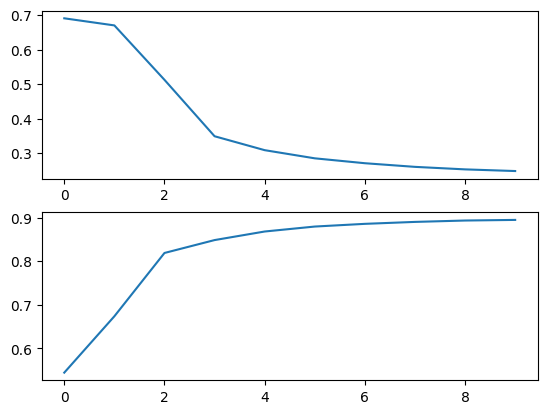

In [44]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['loss'])

ax2 = fig.add_subplot(2,1,2, sharex=ax1)
ax2.plot(history.history['accuracy'])
plt.show()

Se puede ver la perdida en el primer eje y la presicion en el segundo, con esto identificamos el sobre ajuste.

In [45]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy = 100 * accuracy

1803/1803 [==============================] - 6s 3ms/step - loss: 0.2419 - accuracy: 0.8983


In [46]:
predictions = model.predict(X_test)
score_r2 = r2_score(y_test, predictions)
score_rmse = np.sqrt(mean_squared_error(y_test, predictions))

451/451 [==============================] - 1s 2ms/step


In [47]:
print('R2 Score:', score_r2)
print('RMSE Score:', score_rmse)

R2 Score: 0.6772240485174679
RMSE Score: 0.28400579072482446


In [48]:
predictions

array([[0.93132114],
       [0.72863925],
       [0.06072844],
       ...,
       [0.8757983 ],
       [0.10168399],
       [0.7105377 ]], dtype=float32)

In [49]:
predictions.shape

(14419, 1)

In [50]:
pd.DataFrame({
    "predictions": predictions[:, 0],
    "y_test": y_test,
}).sample(100)

,predictions,y_test
31215,0.925019,1
2762,0.339323,0
51679,0.676707,0
37520,0.975101,1
3418,0.010047,0
...,...,...
39285,0.911822,1
50366,0.006670,0
55088,0.912044,1
49166,0.979455,1


##Validate Fake News from a URL (Con la ayuda de una funcion se obtiene el contenido de texto limpio de una noticia (fake) en una web, se busca un tamaño máximo de palabras con el cual aprender y predecir si un texto es falso)

In [51]:
def get_news_paragraphs_cleaned_text(url, container_id, paragraphs_element="p", clean=True):
    response = requests.get(url)
    response_text = response.text
    soup = BeautifulSoup(response_text, 'html.parser') 

    container = soup.find(id=container_id)
    paragraphs = container.findAll(paragraphs_element)

    text = " ".join([paragraph.get_text() for paragraph in paragraphs])

    if not clean:
        return text
        
    return clean_text(text) 

Esta función se usa para obtener el contenido de texto limpio de una noticia de una URL. La función toma como argumentos la URL de la noticia, el ID del contenedor de la noticia y el elemento de párrafo para obtener los párrafos de la noticia. La función también toma un argumento booleano para limpiar el texto. Si el argumento es verdadero, se usará la función clean_text() para limpiar el texto. La función devuelve el contenido de texto limpio de la noticia.

In [52]:
fake_cleaned_text = get_news_paragraphs_cleaned_text(
    url=FAKE_NEWS_URL, 
    container_id='MainW', 
    paragraphs_element="p"
)

In [53]:
fake_cleaned_text

'washington d c a review of fbi director james comey s professional history and relationships shows that the obama cabinet leader now under fire for his handling of the investigation of hillary clinton is deeply entrenched in the big money cronyism culture of washington d c his personal and professional relationships all undisclosed as he announced the bureau would not prosecute clinton reinforce bipartisan concerns that he may have politicized the criminal probe these concerns focus on millions of dollars that comey accepted from a clinton foundation defense contractor comey s former membership on a clinton foundation corporate partner s board and his surprising financial relationship with his brother peter comey who works at the law firm that does the clinton foundation s taxes lockheed martin when president obama nominated comey to become fbi director in 2013 comey promised the united states senate that he would recuse himself on all cases involving former employers but comey earned

El texto se tokeniza y luego se convierte en una secuencia de tokens que se pasa a la función de preprocesamiento de secuencias de Keras para ajustarlo al tamaño máximo especificado (200). Finalmente, el modelo predice si el texto es real o falso usando la función predict (). Esto devuelve una matriz con una sola entrada y una sola salida que es la probabilidad de que el texto sea verdadero o falso.

In [54]:
fake_sequences = tokenizer.texts_to_sequences([fake_cleaned_text])
fake_sequences = tf.keras.preprocessing.sequence.pad_sequences(fake_sequences, maxlen=200) 

In [55]:
fake_prediction = model.predict(fake_sequences)[0][0]

1/1 [==============================] - 0s 361ms/step


In [56]:
fake_prediction

0.0013647043

In [57]:
round_prediction = round(fake_prediction)

In [58]:
round_prediction

0

In [59]:
"Noticia Verdadera" if np.max(round_prediction) == 1 else "Noticia Falsa"

'Noticia Falsa'

##Validate True News from a URL (Se obtiene el contenido de texto limpio de otra noticia (real) de otra web, se utiliza el mismo tamaño máximo de palabras para aprender y predecir si el texto es verdadero)

In [60]:
true_cleaned_text = get_news_paragraphs_cleaned_text(
    url=TRUE_NEWS_URL, 
    container_id='__next', 
    paragraphs_element="p"
)

In [61]:
true_cleaned_text

'sign in kathryn nesbitt had spent a decade balancing parallel careers in analytical chemistry and soccer officiating when in 2019 she put her scientific brain to work and synthesized a solution for the most pragmatic path forward two weeks before nesbitt left for france to serve as an assistant referee at the women s world cup she stepped down from her assistant professor position at towson university to focus on officiating full time what data points informed that decision she reached the pinnacle of women s soccer refereeing that summer and had broken into top flight men s soccer as well with dozens of mls games under her belt knowing the 2026 men s world cup would be held in the united states canada and mexico nesbitt mapped out a plan that would culminate in her being on the sideline of the sport s premier spectacle i had no idea if they d ever let women officiate at that world cup but i wanted to see if i could do that said nesbitt 34 i realized at the time that in order to even 

In [62]:
true_sequences = tokenizer.texts_to_sequences([true_cleaned_text])
true_sequences = tf.keras.preprocessing.sequence.pad_sequences(true_sequences, maxlen=200)

In [63]:
true_prediction = model.predict(true_sequences)[0][0]

1/1 [==============================] - 0s 22ms/step


In [64]:
true_prediction

0.9960622

In [65]:
round_prediction = round(true_prediction)

In [66]:
round_prediction

1

In [67]:
"Noticia Verdadera" if np.max(round_prediction) == 1 else "Noticia Falsa"

'Noticia Verdadera'

# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


¡Éxito! Te vemos en el contenido del siguiente módulo.

##Library (Se importan las librerias necesarias)

In [68]:
##Library import
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt
#Mnist as data set 
from keras.datasets import mnist
#np_utils for one hot format
from keras.utils import np_utils
#to create the model container
from keras.models import Sequential
#to implement convolutional layers
from keras.layers.convolutional import Conv2D, MaxPooling2D
#to use the gradient descending method during training
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras import optimizers

##Reading and Preprocessing for data (Se importan los datos de Mnist desde el módulo de conjuntos de datos de Keras.)

In [69]:
#Use mnist to load data (bitmap of 60 rows of matrix 28x28)
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [70]:
x_train[50000] [5] [9]
#posicion 9 tiene un valor 12 fila 5 de la matriz 28x28 en la posicion 50mil

12

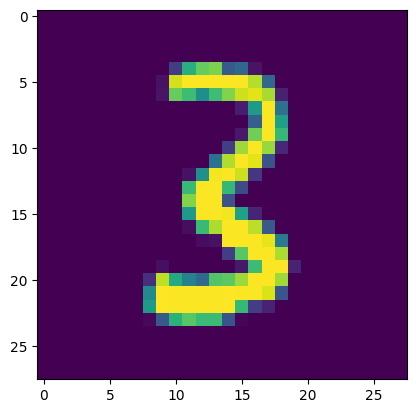

In [71]:
plt.imshow(x_train[50000]) 

In [72]:
print(y_train[50000]) 

3


In [73]:
# Cambiar las dimensiones de las imágenes a 28x28x1 y escalar los valores de píxel
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [74]:
#x_train= x_train.astype('float32')
#x_test= x_test.astype('float32')

In [75]:
#To normalize the values of each image in the range 0 to 1 (bits - rgb values 0-255) 
#x_train = x_train/255.0
#x_test = x_test/255.0

In [76]:
x_train.shape

(60000, 28, 28, 1)

In [77]:
#To convert the training set label to the one-hot format
nclases = 10
y_train = np_utils.to_categorical(y_train,nclases)
y_test = np_utils.to_categorical(y_test,nclases)

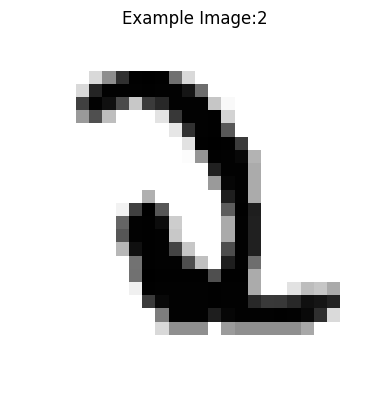

In [78]:
#To visualize one of the mnist image from the set
nimagen=400
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Example Image:' + str(np.argmax(y_train[nimagen])))
plt.axis('off')
plt.show()

In [79]:
#To readjust the training and validation images because they are grayscale images, use reshape .
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

##Implementing Keras model (Se crea un modelo secuencial con tres capas: Entrada (convierte la imagen de pixeles), Oculta (neuronas para aprender los patrones) y Salida (neuronas para generar predicciones). 

- Use Sequential to create the model container

In [80]:
num_classes = 10

modelo = Sequential()
modelo.add(Conv2D(32, 1, padding='same', input_shape=x_train.shape[1:], activation='relu'))
modelo.add(Conv2D(32, 1, activation='relu'))
modelo.add(MaxPooling2D())
modelo.add(Dropout(0.25))                      

modelo.add(Conv2D(64, 1, padding='same', activation='relu'))
modelo.add(Conv2D(64, 1, activation='relu'))
modelo.add(MaxPooling2D())
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(num_classes, activation='softmax'))


modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        64        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        1056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        2112      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        4160      
                                                      

##Model Compilation (Se compila el modelo usando el optimizador RMSprop, con una tasa de aprendizaje y descenso, tiene una funcion de entropia cruzada para calcular la salida prevista y la deseada, con una metrica de precision para medir la exactitud al predecir.)

In [81]:
modelo.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

##Training and validation of the model ( Se usa el metodo fit para entrenar el modelo, se usan los datos de entrenamiento, un numero de épocas, tamaño del lote, verbose como nivel de detalle, y con los datos de prueba se valida el modelo. Los resultados se almacenan en una variable history para su visualización)

In [82]:
batch_size = 32
epochs = 20

In [83]:
history = modelo.fit(x_train, y_train, 
                    batch_size= batch_size, 
                    epochs= epochs, 
                    validation_data= (x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7485 - acc: 0.7715 - val_loss: 0.4859 - val_acc: 0.8503
Epoch 2/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4286 - acc: 0.8630 - val_loss: 0.4422 - val_acc: 0.8736
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3592 - acc: 0.8865 - val_loss: 0.4462 - val_acc: 0.8749
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3227 - acc: 0.8986 - val_loss: 0.4475 - val_acc: 0.8780
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2988 - acc: 0.9082 - val_loss: 0.4355 - val_acc: 0.8956
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2822 - acc: 0.9133 - val_loss: 0.4056 - val_acc: 0.9170
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2712 - acc: 0.9170 - val_loss: 0.3917 - val_acc: 0.9282
Epoch 8/20
1875/1875 [==============================] - 9s 

##Performance evaluation (Se realiza una gráfica para visualizar la evolución de la pérdida y precisión del entrenamiento)

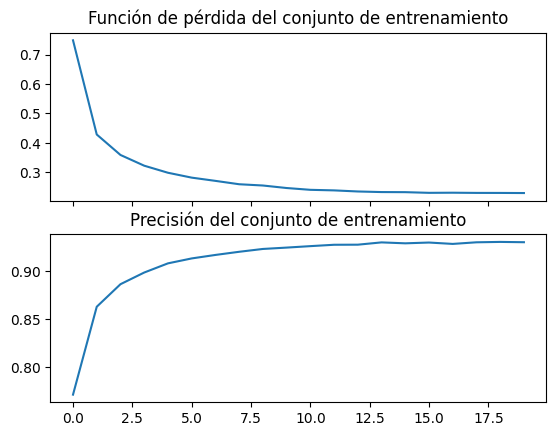

In [84]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')
ax2 = fig.add_subplot(2,1,2, sharex= ax1)
ax2.plot(history.history['acc'])
ax2.set_title('Precisión del conjunto de entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

## Confusion Matrix Graph (Se muestra la cantidad de veces que cada clase fue correctamente o incorrectamente predicha)

In [85]:
#Se crea la funcion de la matriz de confusion 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):

    titulo = 'Matriz de confusión'

    cm = confusion_matrix(y_ref, y_pred)

    # Generar figura
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Categoría real',
           xlabel='Predicción')

    # Rotar y alinear ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Rellenar gráfica con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

313/313 [==============================] - 1s 2ms/step


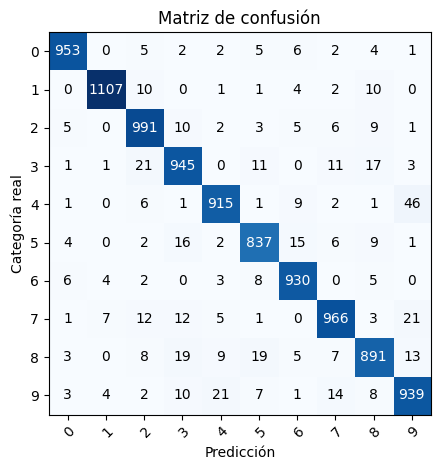

In [86]:
#To analize the detail of behavior to use the confusion matrix
#from matriz_confusion import graficar_matriz_de_confusion

y_pred = modelo.predict(x_test)
y_ref = np.argmax(y_test,axis=1)
y_pred = np.argmax(y_pred,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)

##10 predictions (Generamos un conjunto de 10 predicciones con los mismos datos del dataset de prueba. Esto nos permite ver si el modelo se comporta de la misma manera con datos desconocidos)

In [87]:
# Generate 10 predictions

predictions = modelo.predict(x_test[0:10])

# print the predictions

for i in range(len(predictions)):
    print("prediction", i, ": ", np.argmax(predictions[i]))

1/1 [==============================] - 0s 219ms/step
prediction 0 :  7
prediction 1 :  2
prediction 2 :  1
prediction 3 :  0
prediction 4 :  4
prediction 5 :  1
prediction 6 :  4
prediction 7 :  9
prediction 8 :  6
prediction 9 :  9
